<a href="https://colab.research.google.com/github/chaimaagassir/machine-learning/blob/main/scikitlearnPredictionPrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
X = df['price']
y=df['sqft_above']

In [5]:
X

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [7]:
y

0        1180.0
1        2170.0
2         770.0
3        1050.0
4        1680.0
          ...  
21608    1530.0
21609    2310.0
21610    1020.0
21611    1600.0
21612    1020.0
Name: sqft_above, Length: 21613, dtype: float64

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
polynomial_converter = PolynomialFeatures(degree=7,include_bias=True)

In [10]:
# Le convertisseur s'adapte aux données, dans ce cas, il lit chaque colonne X.
# Puis il "transforme" et sort les nouvelles données polynomiales.
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.
#reshape(1, -1) if it contains a single sample.
#
X=X.values.reshape(-1, 1)

In [11]:
# Le convertisseur s'adapte aux données, dans ce cas, il lit chaque colonne X.
# Puis il "transforme" et sort les nouvelles données polynomiales.
poly_features = polynomial_converter.fit_transform(X)

In [12]:
poly_features.shape

(21613, 8)

In [13]:
X[0]

array([221900.])

In [14]:
poly_features[0]

array([1.00000000e+00, 2.21900000e+05, 4.92396100e+10, 1.09262695e+16,
       2.42453919e+21, 5.38005247e+26, 1.19383364e+32, 2.64911685e+37])

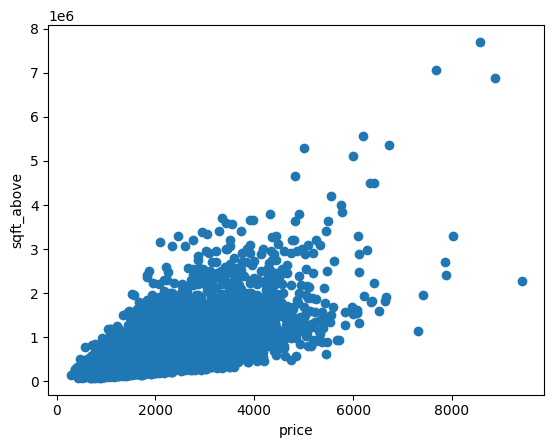

In [15]:
plt.plot(y,X,'o')
plt.xlabel('price')
plt.ylabel('sqft_above')
plt.show()

In [16]:
X.shape

(21613, 1)

In [17]:
X[0]

array([221900.])

In [18]:
poly_features[0]

array([1.00000000e+00, 2.21900000e+05, 4.92396100e+10, 1.09262695e+16,
       2.42453919e+21, 5.38005247e+26, 1.19383364e+32, 2.64911685e+37])

In [19]:
from sklearn.model_selection import train_test_split

In [24]:
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression(fit_intercept=True)

In [27]:
model.fit(X_train,y_train)

ValueError: ignored